# Lending Club Case Study       
                           
Team Member Detail:
1. Name: Navajith R Reddy
   Email ID: navajithreddy1999@gmail.com 
   Phone no: 8147183228

2. Name: Aasheesh Kumar Rai
   Email ID: kumarrai20a@gmail.com
   Phone no: 9650629059

## 1. Data Exploration

In [1]:
# Importing the necessary Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Data from excel files
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Understanding the Dataset and Data-types of Variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
df.shape

(39717, 111)

In [5]:
#Understanding the variables/columns
Data_Dictionary = pd.read_excel('Data_Dictionary.xlsx')
Data_Dictionary = Data_Dictionary[['LoanStatNew', 'Description']]
Data_Dictionary.set_index(['LoanStatNew'], inplace=True)

In [6]:
Data_Dictionary.head()

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...


## 2. Data Cleaning

In [7]:
#Checking for Empty Columns
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [8]:
# Checking for columns with missing values more than 50%
df.columns[df.apply(lambda df:(df.isnull().sum()/len(df))*100>=50)]

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
# Removing columns with missing values more than 50%
df1=df.drop(df.columns[df.apply(lambda df:(df.isnull().sum()/len(df))*100>=50)],axis=1)
df1= df1[df1.loan_status!='Current'] #Removing Current records in loan status, as we need only Charged off and Fully Paid

In [10]:
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## 3. Feature Selection

In [11]:
#Unique values
c=[]
v=[]
for i in df1.columns:
    c.append(i)
    v.append(df1[i].nunique())
NUnique = pd.DataFrame(v,c, columns=['Number_of_Unique_Values']).sort_values(ascending=False, by='Number_of_Unique_Values')
NUnique.tail()

,Number_of_Unique_Values
collections_12_mths_ex_med,1
out_prncp,1
pymnt_plan,1
initial_list_status,1
tax_liens,1


In [12]:
# Single Unique Columns
print("The following Variables are observed to have just one possible outcome:\n")
for i in NUnique[NUnique.Number_of_Unique_Values==1].index:
    print(Data_Dictionary.loc[i].Description, '---> ',df1[i].unique()[0])

The following Variables are observed to have just one possible outcome:

Indicates whether the loan is an individual application or a joint application with two co-borrowers --->  INDIVIDUAL
The past-due amount owed for the accounts on which the borrower is now delinquent. --->  0
Number of charge-offs within 12 months --->  0.0
The number of accounts on which the borrower is now delinquent. --->  0
Remaining outstanding principal for portion of total amount funded by investors --->  0.0
publicly available policy_code=1
new products not publicly available policy_code=2 --->  1
Number of collections in 12 months excluding medical collections --->  0.0
Remaining outstanding principal for total amount funded --->  0.0
Indicates if a payment plan has been put in place for the loan --->  n
The initial listing status of the loan. Possible values are – W, F --->  f
Number of tax liens --->  0.0


In [13]:
# Filtering the Dataset
df2 = df1[NUnique[NUnique.Number_of_Unique_Values!=1].index] #Removing columns with single unique value, as we may not be able to draw any conclusions from it.
df2.reset_index(inplace=True)
df2 = df2.drop('index', axis=1)

In [14]:
# Checking the Data types of all features
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   url                      38577 non-null  object 
 3   total_pymnt              38577 non-null  float64
 4   total_pymnt_inv          38577 non-null  float64
 5   last_pymnt_amnt          38577 non-null  float64
 6   total_rec_int            38577 non-null  float64
 7   emp_title                36191 non-null  object 
 8   desc                     26050 non-null  object 
 9   revol_bal                38577 non-null  int64  
 10  title                    38566 non-null  object 
 11  installment              38577 non-null  float64
 12  funded_amnt_inv          38577 non-null  float64
 13  total_rec_prncp          38577 non-null  float64
 14  annual_inc            

In [15]:
# Changing the data type of intrest rate to float
df2['int_rate'] = df2['int_rate'].apply(lambda x : float(x[:-2]))

## 3. Data Analysis

In [16]:
df2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

We observe that majority of our disbursed loans are fully paid covering about 85.5%, while 14.5% being defaulters.


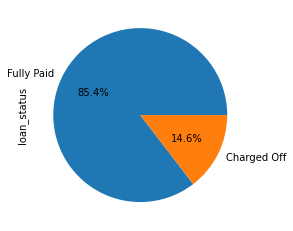

In [17]:
df2['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
print('We observe that majority of our disbursed loans are fully paid covering about 85.5%, while 14.5% being defaulters.')

In [18]:
#Since most of our Analysis is centered around the Status of Disbursed Loan, Hence we create two Groups
G1 = df2.groupby('loan_status')
G1.groups.keys()

dict_keys(['Charged Off', 'Fully Paid'])

In [19]:
#Let us now begin to analyze the data w.r.t the data types - i.e, categorical & numeric
df2.dtypes.value_counts()

object     19
float64    14
int64      10
dtype: int64

## 3.1 Data Analysis - On Categorical Variables

In [20]:
# Analyzing the categorical Vairbales
c=[]
for i in df2.select_dtypes('object').columns:
    c.append(i)
CV=pd.DataFrame(c, columns=['Categorical_Variables'])
CV

,Categorical_Variables
0,url
1,emp_title
2,desc
3,title
4,revol_util
5,zip_code
6,earliest_cr_line
7,last_credit_pull_d
8,last_pymnt_d
9,issue_d


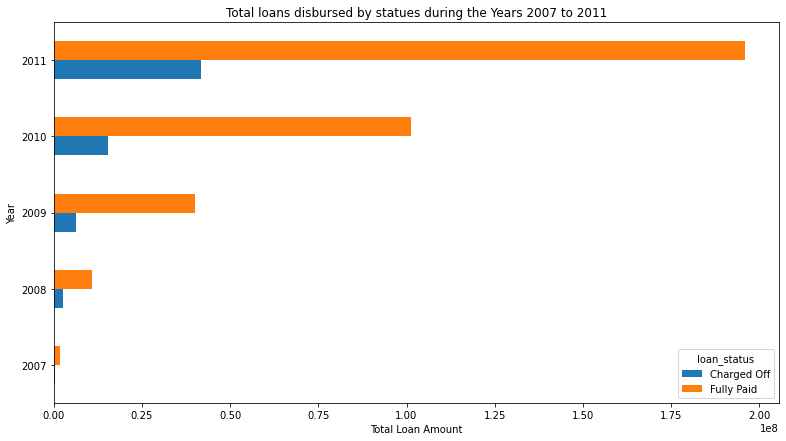

In [21]:
# Analyzing Loan Status over different years
import datetime as dt
df2['Year'] = pd.to_datetime(df2.issue_d, format='%b-%y').dt.year
df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().plot(kind='barh', figsize=[13,7])
plt.title('Total loans disbursed by statues during the Years 2007 to 2011')
plt.xlabel('Total Loan Amount')
plt.show()

we derive that applicant’s who have more than 10-year experience has more number of loan applications.


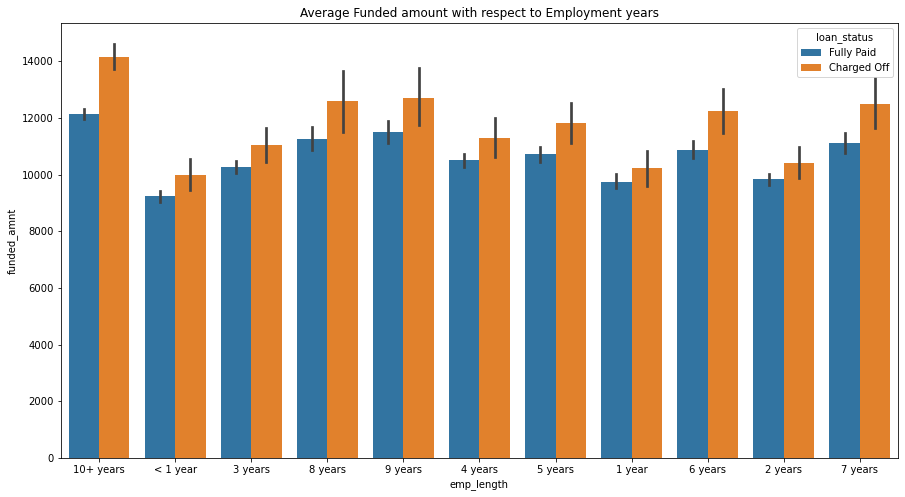

In [22]:
#Analyzing the Employment Duration over the status of sanctioned Loan
plot = plt.figure(figsize=(15, 8))
sns.barplot(df2['emp_length'], df2['funded_amnt'], hue=df2['loan_status'])
plt.title('Average Funded amount with respect to Employment years')
print("we derive that applicant’s who have more than 10-year experience has more number of loan applications.")

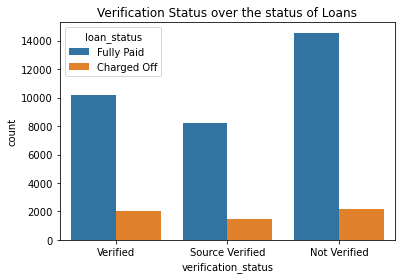

In [23]:
#Analyzing the Verification Status over the status of sanctioned Loan
sns.countplot(df2['verification_status'], hue=df2['loan_status'])
plt.title('Verification Status over the status of Loans')
plt.show()

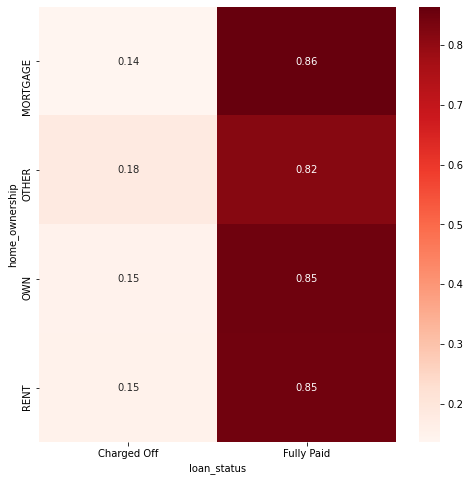

We infer that applicants whose Home Ownership is filled with ‘OTHER’ option are more likely to charge-off.


In [24]:
#Analyzing the Home Ownership Status over the status of sanctioned Loan
plt.figure(figsize=[8,8])
sns.heatmap((G1.home_ownership.value_counts().unstack().T[['Charged Off','Fully Paid']].T/G1.home_ownership.value_counts().unstack().T[['Charged Off','Fully Paid']].T.sum()).T.drop('NONE'), cmap='Reds', annot=True, fmt='.2f')
plt.show()
print("We infer that applicants whose Home Ownership is filled with ‘OTHER’ option are more likely to charge-off.")

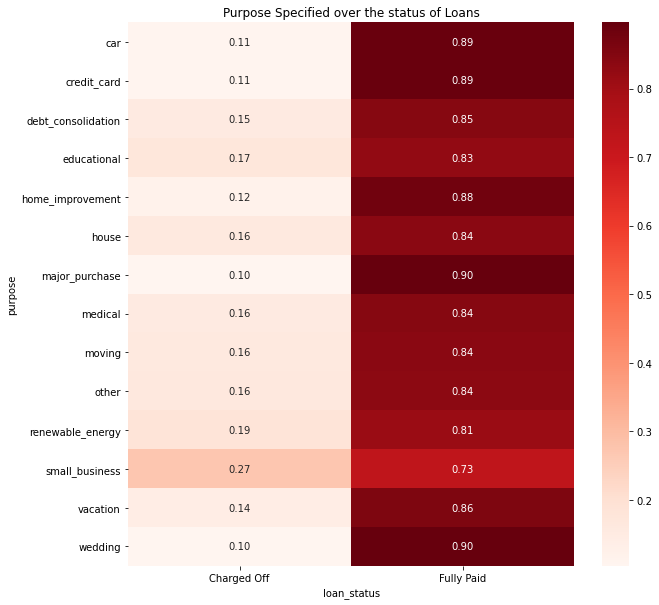

We observe that applicants whose purpose of applying loan is Small Business, are more likely to charged off, while the one’s applying for purpose of wedding, car, credit card or other major purchases are more likely to repay the entire loan within the given period.


In [25]:
#Analyzing the Category of Reason/Purpose specified by borrower over the status of sanctioned Loan
plt.figure(figsize=[10,10])
sns.heatmap((G1.purpose.value_counts().unstack()/G1.purpose.value_counts().unstack().sum()).T, cmap='Reds', annot=True, fmt='.2f')
plt.title('Purpose Specified over the status of Loans')
plt.show()
print("We observe that applicants whose purpose of applying loan is Small Business, are more likely to charged off, while the one’s applying for purpose of wedding, car, credit card or other major purchases are more likely to repay the entire loan within the given period.")

## 3.2 Data Analysis - On Numeric Variables

In [26]:
num_df = df2[['annual_inc', 'funded_amnt', 'loan_amnt', 'installment', 'int_rate', 'total_rec_int', 'loan_status']]

IndexError: index 6 is out of bounds for axis 0 with size 6

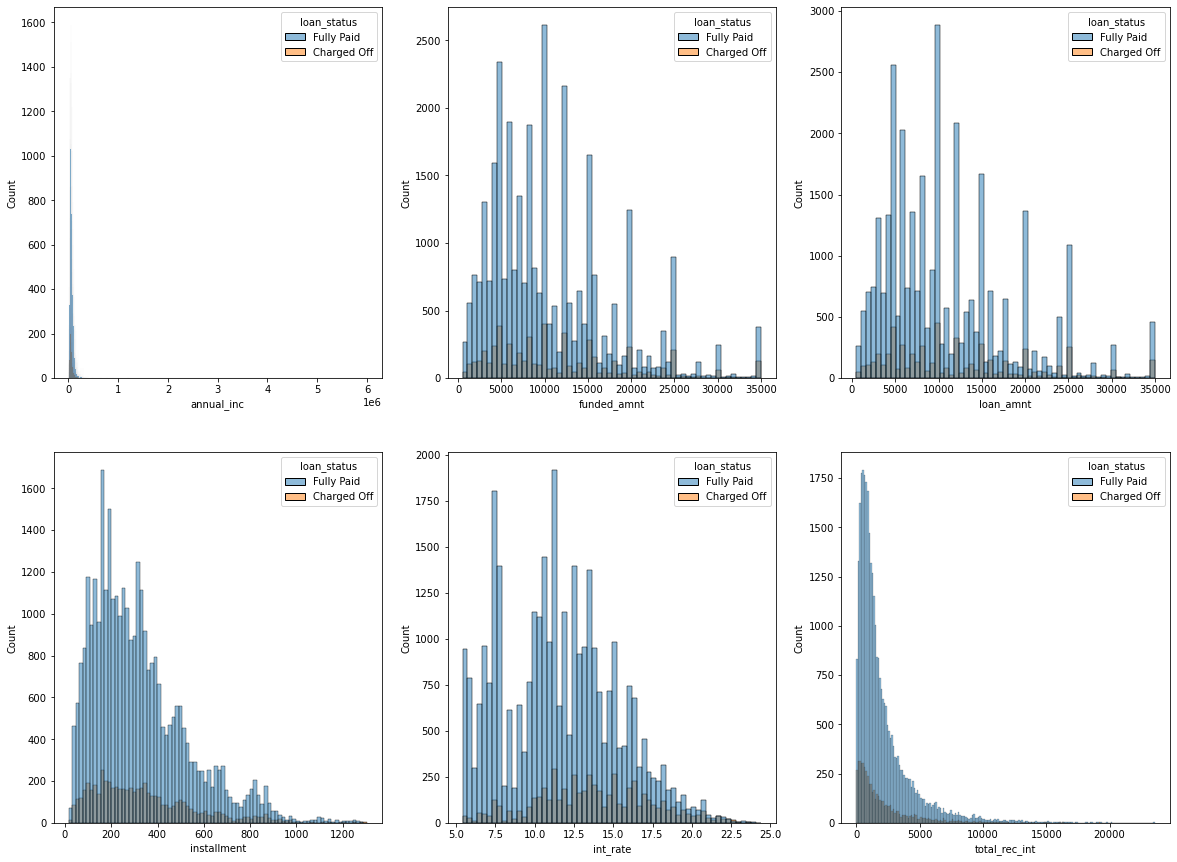

In [27]:
# Analyzing the Numerical Vairbales with Histograms
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (20, 15))
index = 0
ax = ax.flatten()
while index <= 6 :
    for col, value in num_df.items():
        sns.histplot(x=col, data=num_df, ax=ax[index], hue=num_df['loan_status'])
        index += 1
plt.tight_layout( pad=0.5, w_pad=0.7, h_pad=5)

IndexError: index 6 is out of bounds for axis 0 with size 6

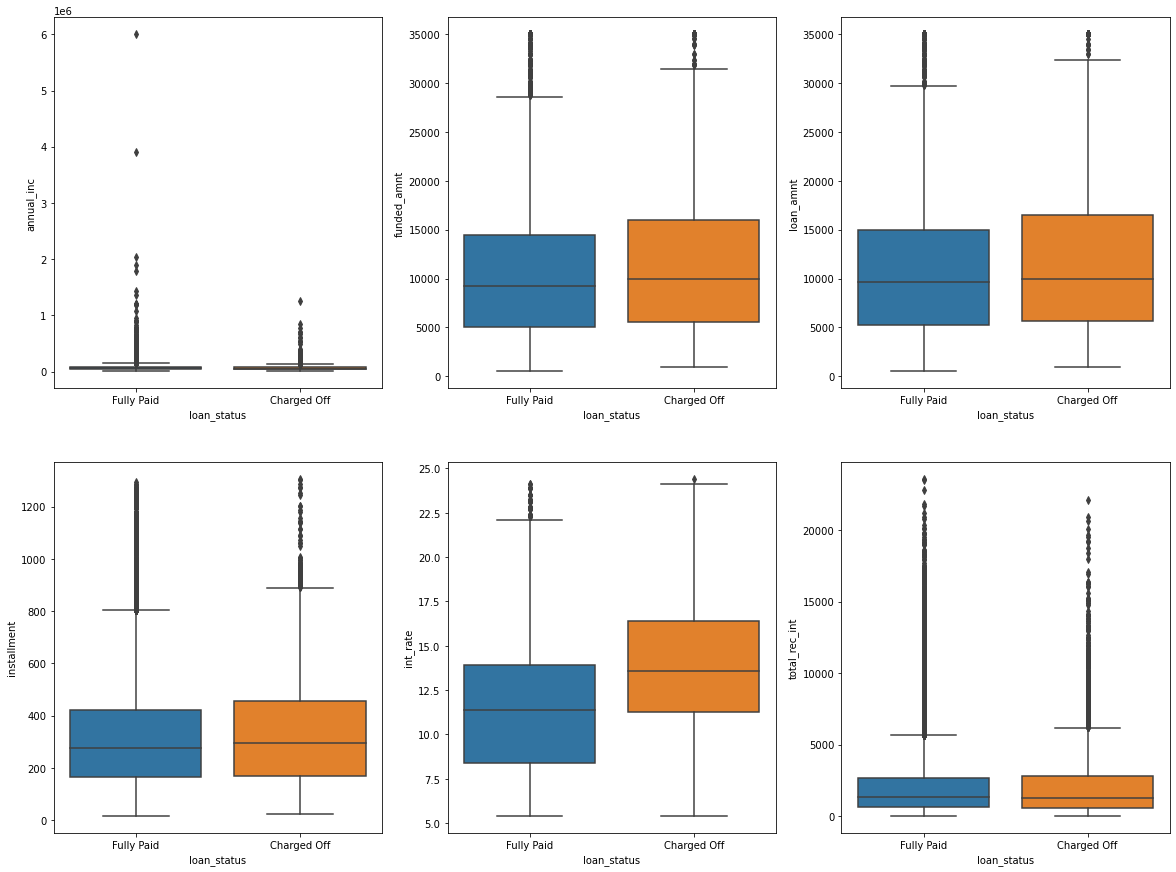

In [28]:
# Analyzing the Distribution of variable and looking for outliers with box plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (20, 15))
index = 0
ax = ax.flatten()
while index <= 6 :
    for col, value in num_df.items():
        sns.boxplot(data=num_df, x='loan_status', y=col, ax=ax[index])
        index += 1
plt.tight_layout( pad=0.5, w_pad=0.7, h_pad=5)

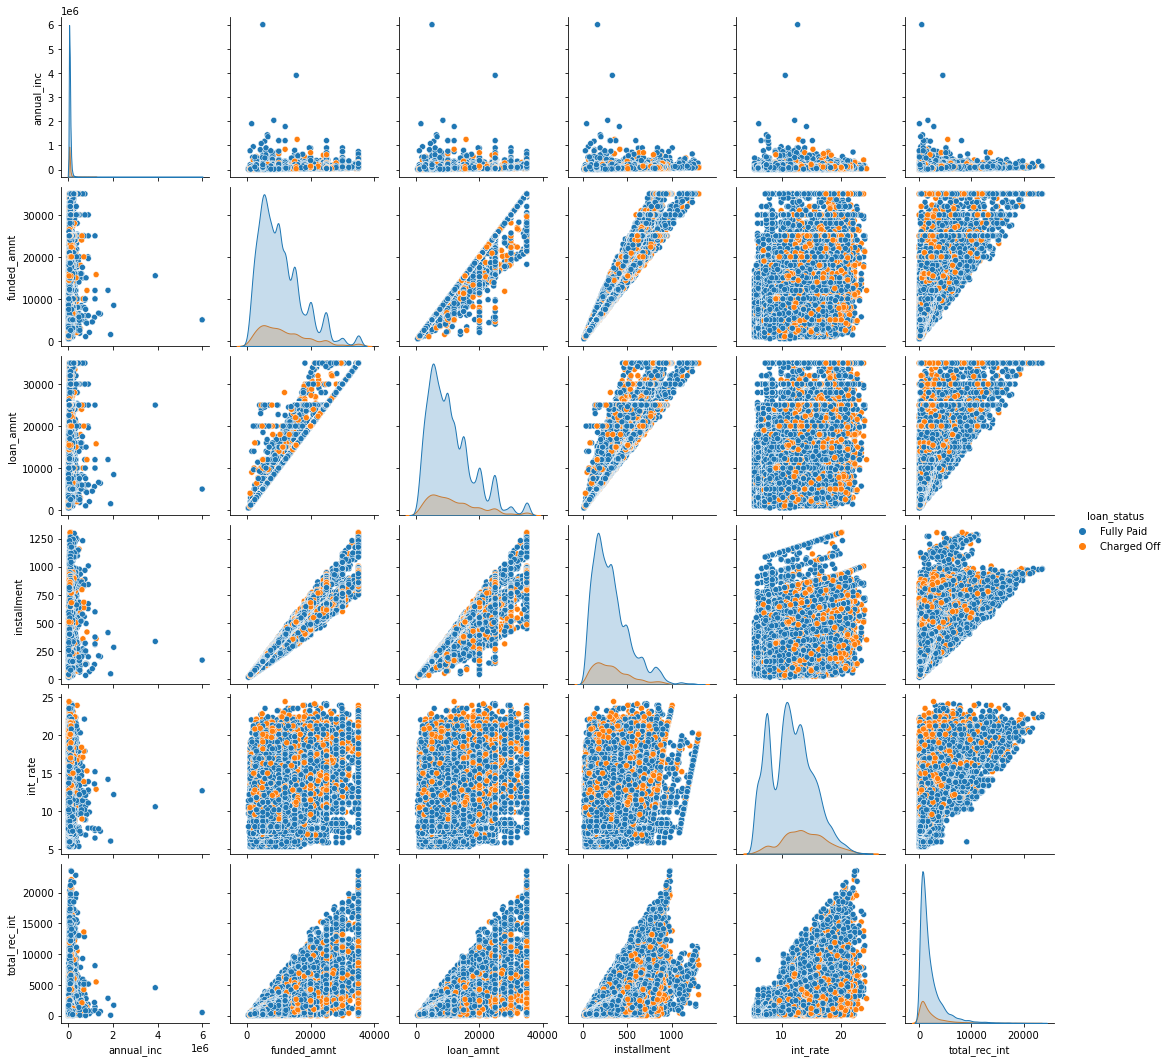

In [29]:
# Analyzing the Numerical Vairbales with respect to each other
sns.pairplot(data=num_df, hue='loan_status')

In [ ]:
plot = plt.figure(figsize=(15, 8))
sns.boxplot(x = df2['verification_status'], y = df2['funded_amnt'] , hue = df2['loan_status'])

In [ ]:
#Analyzing the preferred range to give valuable insights.
plt.figure(figsize=[16,10])
plt.subplot(2,2,1)
sns.heatmap((G1.emp_length.value_counts().unstack()/G1.emp_length.value_counts().unstack().sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='Reds')
plt.subplot(2,2,2)
sns.heatmap((G1.verification_status.value_counts().unstack()/G1.verification_status.value_counts().unstack().sum()).T, annot=True,cmap='Reds')
plt.subplot(2,2,3)
sns.heatmap((G1.purpose.value_counts().unstack()/G1.purpose.value_counts().unstack().sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='Reds')
plt.subplot(2,2,4)
sns.heatmap((df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().T/df2.groupby(['Year','loan_status']).funded_amnt.sum().unstack().T.sum()).T.sort_values(by='Fully Paid', ascending=False), annot=True,cmap='Reds')
plt.show()

### Conclusions:

Based on detailed analysis, the following Strategies are recommended for Lending Club, in order to minimize the risks involved in lending loans & to  maximize their profitability
* Encourage Short Term Loans.
* Applicants with ‘Others’ as their home ownership are more risky, as they have bad payment records.
* Almost all experience levels curb the same full payment likelihood. 
* Loans assigned for the purpose of Small Business bring are to be avoided as much as possible, rather approve prompt on Major Purchases, Wedding, Car, Credit Card, etc.
* Lending to a ‘non-verified’ applicant can be encouraged, based on its high frequency and low charge-off ratio.
* Lastly, it is recommended to levy an optimal interest rate of around 12.5%. Higher interest increases the probability of defaulting, & lower rates reduce the risk, but also profitability is affected.

<<<--------------------------------------------------------THE END--------------------------------------------------------->>>